# TASK 1.1 
Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Save dataset to CSV
df = pd.DataFrame(np.hstack((X, y[:, np.newaxis])), columns=['Feature1', 'Feature2', 'Label'])
df.to_csv('DS1.csv', index=False)

# TASK 1.2 
Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

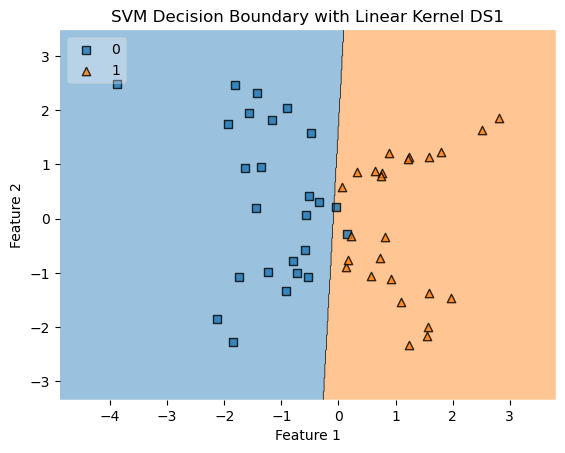

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load dataset
df = pd.read_csv('DS1.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Convert y to integers
y = y.astype(int)

# Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel DS1')
plt.show()


# TASK 1.3 
Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [122]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

oneout = LeaveOneOut()
oneout.get_n_splits(X)
#model evaluation
scores = cross_val_score(svm, X, y, cv=oneout)
print(f'Training performance: {svm.score(X, y):.2f}')
print(f'oneout CV Test performance: {scores.mean():.2f}')

Training performance: 0.96
oneout CV Test performance: 0.96


# TASK 1.4 
Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

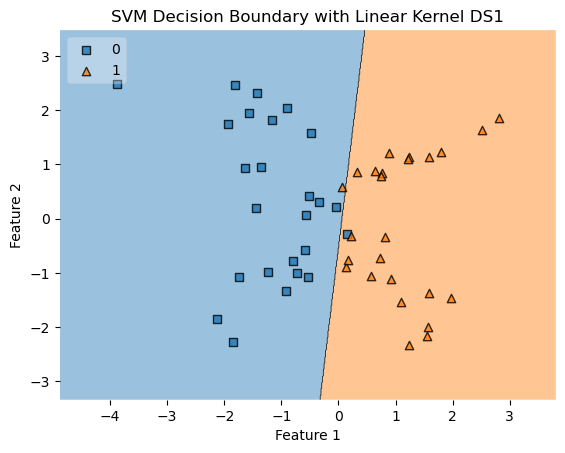

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load dataset
df = pd.read_csv('DS1.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Convert y to integers
y = y.astype(int)

# Train SVM
svm2 = SVC(kernel='linear', C=50.0)
svm2.fit(X, y)

# Plot decision boundary
plot_decision_regions(X, y, clf=svm2, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel DS1')
plt.show()


In [124]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

oneout = LeaveOneOut()
oneout.get_n_splits(X)
#model evaluation
scores = cross_val_score(svm, X, y, cv=oneout)
print(f'Training performance: {svm2.score(X, y):.2f}')
print(f'oneout CV Test performance: {scores.mean():.2f}')

Training performance: 0.96
oneout CV Test performance: 0.96


# TASK 1.5 
Explain what C does and how it improved the SVM in this case.

Solution: The parameter C in a linear SVM is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
When C is small, the SVM allows some misclassifications (i.e., it tolerates some errors on the training set) but aims to find a larger margin separating the classes. This can lead to better generalization on unseen data but might underfit the training data
When C is large, the SVM aims to classify all training examples correctly, which can result in a smaller margin. This can lead to better training performance but might overfit the training data, causing poorer generalization to new data.
In the context of the dataset created and the results observed:
Initial SVM (with default C=1.0): The decision boundary might not perfectly separate the classes, leading to some misclassifications. The leave-1-out cross-validation performance provides an estimate of the generalization error
Improved SVM (with optimized C=50.0): By adjusting C, we found a balance that minimizes misclassifications on the training set while still maintaining a reasonable margin. 
Thus, C improved the SVM by finding the optimal balance between classification accuracy on the training data and the ability to generalize to new, unseen data..
.


# TASK 2.1 
Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.
Solution: I used 5-fold cross-validation instead of leave-1-out cross-validation for evaluating the SVM on DS2.
Explanatio
5-Fold Cross-Validation:
What I did: Divided the dataset into 5 equal parts (folds). Trained the SVM on 4 folds and tested it on the remaining fold. This process was repeated 5 times, each time with a different fold used as the test set. The performance metrics were averaged over the 5 iterations to obtain a more stable estimat


Why I chose this approach:
Efficiency: 5-fold cross-validation is computationally less expensive than leave-1-out cross-validation, especially with larger datasets. Leave-1-out requires training the mode𝑛
n times (wh
𝑛
n is the number of samples), whereas 5-fold requires only 5 iterations.
Bias-Variance Trade-off: 5-fold cross-validation provides a good balance between bias and variance. It gives a reliable estimate of the model's performance with reduced computational load compared to leave-1-out, which can have high variance due to training on almost the entire dataset for each iteration.
Practicality: It is a widely used and accepted method in machine learning for evaluating model performance, offering a compromise between the computational efficiency of holdout validation and the thoroughness of leave-1-out cross-validation.e.n:

In [125]:
# Load DS2
df2 = pd.read_csv('D2.csv')
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1].values

# Train SVM
svm2 = SVC(kernel='linear', C=1.0)
svm2.fit(X2, y2)

# Evaluate using 5-fold cross-validation
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(svm2, X2, y2, cv=5)
print(f'Training performance: {svm2.score(X2, y2):.2f}')
print(f'5-Fold CV Test performance: {scores2.mean():.2f}')

Training performance: 0.57
5-Fold CV Test performance: 0.57


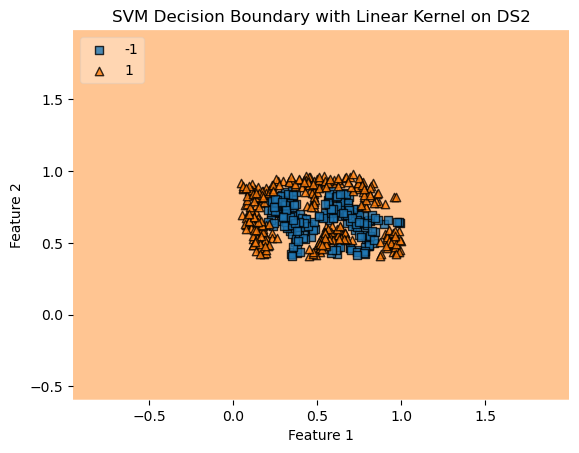

In [126]:
# Plot decision boundary
plot_decision_regions(X2, y2, clf=svm2, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel on DS2')
plt.show()


# TASK 2.2 
Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

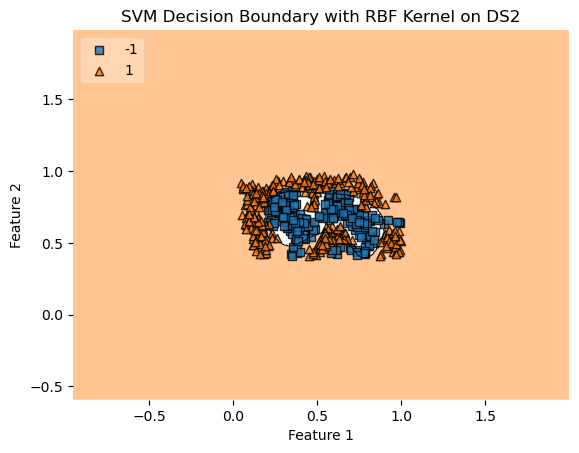

RBF Training performance: 0.86
RBF 5-Fold CV Test performance: 0.84


In [127]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X2, y2)

# Plot decision boundary
plot_decision_regions(X2, y2, clf=svm_rbf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel on DS2')
plt.show()

# Evaluate model with RBF kernel
rbf_scores = cross_val_score(svm_rbf, X2, y2, cv=5)
print(f'RBF Training performance: {svm_rbf.score(X2, y2):.2f}')
print(f'RBF 5-Fold CV Test performance: {rbf_scores.mean():.2f}')

# TASK 2.3 
Explain which kernel you chose and why.

Solution:
Here I have chosen Radial Basis Function (RBF) kernel. It works well with non linear data. RBF SVM works by mapping the input data into a higher-dimensional feature space, where the classes can be separated by a hyperplane. The algorithm uses a kernel function, such as the Radial Basis Function, to measure the similarity between pairs of data points in the feature space.

We can also see that the RBF model 5-Fold CV Test performance: 0.84
whereas Linear model 5-Fold CV Test performance: 0.57


# TASK 3.1 
Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

Solution: I used StratifiedKFold cross-validation for DS3 to ensure each fold maintains the same class proportion as the entire dataset. This approach provides balanced, representative evaluation, reduces computational load compared to leave-1-out, and offers reliable performance estimates, particularly beneficial for imbalanced datasets.


In [128]:
# Load DS3
df3 = pd.read_csv('D3.csv')
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Train SVM
svm3 = SVC(kernel='linear', C=1.0)
svm3.fit(X3, y3)

# Evaluate using StratifiedKFold cross-validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores3 = cross_val_score(svm3, X3, y3, cv=skf)
print(f'Training performance: {svm3.score(X3, y3):.2f}')
print(f'Stratified 5-Fold CV Test performance: {scores3.mean():.2f}')


Training performance: 0.96
Stratified 5-Fold CV Test performance: 0.96


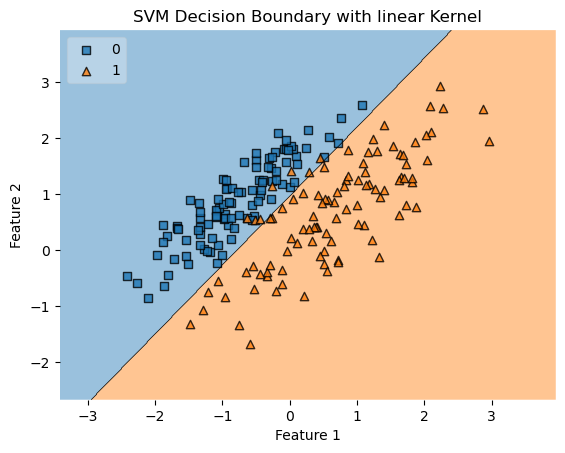

In [129]:
# Plot decision boundary
plot_decision_regions(X3, y3, clf=svm3, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with linear Kernel')
plt.show()

# TASK 3.2 
Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.

In first model I have chosen an RBF model with hyperparameters : C=100, gamma=0.01

In [130]:
# Load DS3
df3 = pd.read_csv('D3.csv')
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Train SVM
svm3_modified = SVC(kernel='rbf', C=100, gamma=0.01)
svm3_modified.fit(X3, y3)

# Evaluate using StratifiedKFold cross-validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores3 = cross_val_score(svm3_modified, X3, y3, cv=skf)
print(f'Training performance: {svm3_modified.score(X3, y3):.2f}')
print(f'Stratified 5-Fold CV Test performance: {scores3.mean():.2f}')

Training performance: 0.96
Stratified 5-Fold CV Test performance: 0.97


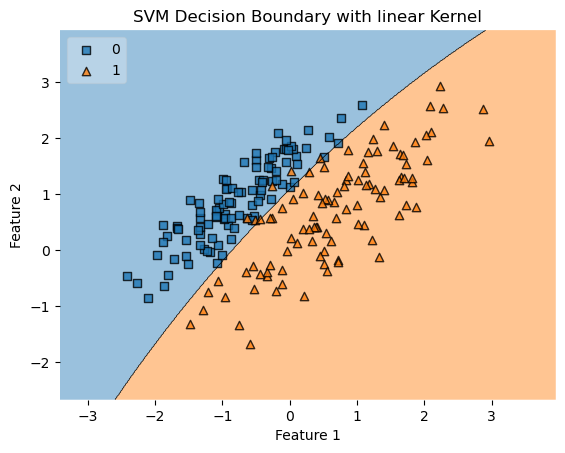

In [131]:
# Plot decision boundary
plot_decision_regions(X3, y3, clf=svm3_modified, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with linear Kernel')
plt.show()

In Second model I have chosen an RBF model with hyperparameters : C=1.0, gamma=10

In [132]:
# Load DS3
df3 = pd.read_csv('D3.csv')
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Train SVM
svm3_modifiedhy = SVC(kernel='rbf', C=1.0, gamma=10)
svm3_modifiedhy.fit(X3, y3)

# Evaluate using StratifiedKFold cross-validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores3 = cross_val_score(svm3_modifiedhy, X3, y3, cv=skf)
print(f'Training performance: {svm3_modifiedhy.score(X3, y3):.2f}')
print(f'Stratified 5-Fold CV Test performance: {scores3.mean():.2f}')

Training performance: 0.98
Stratified 5-Fold CV Test performance: 0.95


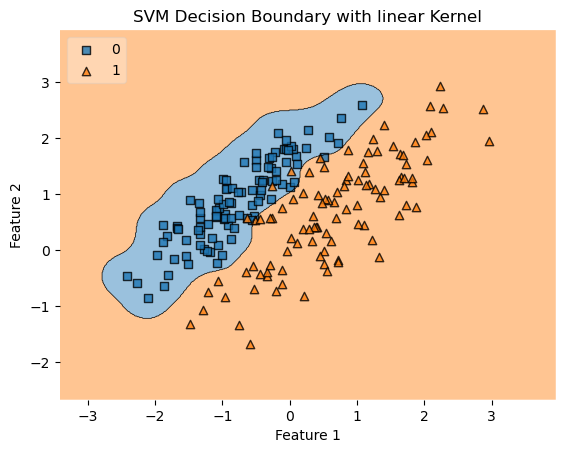

In [133]:
# Plot decision boundary
plot_decision_regions(X3, y3, clf=svm3_modifiedhy, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with linear Kernel')
plt.show()

In third model I have chosen an RBF model with hyperparameters : C=100, gamma=10

In [134]:
# Load DS3
df3 = pd.read_csv('D3.csv')
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Train SVM
svm3_modifiedhy3 = SVC(kernel='rbf', C=100, gamma=10)
svm3_modifiedhy3.fit(X3, y3)

# Evaluate using StratifiedKFold cross-validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores3 = cross_val_score(svm3_modifiedhy3, X3, y3, cv=skf)
print(f'Training performance: {svm3_modifiedhy3.score(X3, y3):.2f}')
print(f'Stratified 5-Fold CV Test performance: {scores3.mean():.2f}')

Training performance: 0.99
Stratified 5-Fold CV Test performance: 0.90


# TASK 3.3 
Explain the results of the previous step.

Solution:
First Model:RBF model with hyperparameters : C=100, gamma=0.01

Second Model: RBF model with hyperparameters : C=1.0, gamma=10

Third Model: RBF model with hyperparameters : C=100, gamma=10

PERFORMANCE:

First Model: Training performance: 0.96
Stratified 5-Fold CV Test performance: 0.9
This model gives good performance as it does not overfit or under fit and seems to be the optimal kernel for given dataset.

Second Model:Training performance: 0.98
Stratified 5-Fold CV Test performance: 0.9
This model seems to overfit the training data

Third Model: Training performance: 0.99
Stratified 5-Fold CV Test performance: 0.9
This model seems to overfit the training data at a very high extent.057